# Récupération des données

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nous récupérons la base de données initiale prise du site de l'AGRESTE et qui porte sur les prix à la vente des produits alimentaires.
Pour créer notre panier étudiant type, nous avons partagé un formulaire avec les étudiants de notre promotion. Nous nous sommes servis des réponses pour choisir les quantités de produits alimentaires consommés mensuellement.

In [2]:

df=pd.read_csv('/content/drive/My Drive/Projet pds/panier.txt', sep=";") #base de données principales
df.head()
df1=df.drop('Indicateur', axis=1, inplace=False)
df2=df1.transpose()
df2.columns= df2.iloc[0]
df3=df2.drop(df2.index[0])
df4=df3.assign(key=[i for i in range(216)]) #création d'une clé
df4

Produit,Steak hache,Pains et cereales : pates superieures,Emmental francais,Huile de tournesol,Beurre extra-fin (250g),Oignon,Tomate,Sucre,Lait,Escalope,...,Salade,Carotte,Champignon,Concombre,Courgette,Yaourts nature (500 g),Poisson,Baguette,Panier Mensuel Moyen,key
janv-02,"16,744","5,84","3,232","0,84","1,1175","0,98","1,967","0,399","0,462","18,09",...,"1,91","0,615","2,526",0,"2,036","5,84","9,144","6,75","82,93 ",0
févr-02,"16,744","5,84","3,24","0,85","1,1175","0,994","2,03","0,399","0,462","17,84",...,"1,83","0,61","2,532",0,"1,496","5,84","8,598","6,75","81,88 ",1
mars-02,"16,629","5,84","3,224","0,855","1,11","0,987","2,597","0,399","0,462","17,96",...,"1,55","0,63","2,532","1,54","0,984","5,84","7,902","6,775","82,76 ",2
avr-02,"16,79","5,92","3,248","0,855","1,1175","1,008","2,807","0,399","0,462","18,11",...,"1,24","0,695","2,532","1,07","0,748","5,84","8,022","6,775","82,88 ",3
mai-02,"16,721","5,92","3,256","0,865","1,125","1,092","2,24","0,402","0,462","17,8",...,"1,06","0,69","2,538","0,835","0,668","5,92","9,348","6,775","83,11 ",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
août-19,"27,002","6,24","3,448","1,045","1,6425","1,82","2,205","0,291","0,609","24,58",...,0,"0,875","2,916",0,"0,764","5,76","11,604","8,8","106,57 ",211
sept-19,"27,048","6,16","3,448","1,05","1,6425","1,757","2,268","0,291","0,609","24,55",...,0,"0,835","2,892",0,"0,764","5,76","11,688","8,8","104,45 ",212
oct-19,"27,163","6,16","3,44","1,05","1,6425","1,729","1,967","0,294","0,609","24,45",...,0,"0,805","2,88",0,"0,752","5,76","11,262","8,825","103,60 ",213
nov-19,"27,186","6,16","3,444","1,05","1,6425","1,694","2,044","0,294","0,616","24,43",...,0,"0,78","2,886",0,"0,832","5,68","11,874","8,825","104,27 ",214


Maintenant, on rajoute une variable explicative qui est "l'indice des prix à la consommation". Ces données proviennent de l'INSEE.

In [3]:
ipc=pd.read_csv('/content/drive/My Drive/Projet pds/ipc_.csv', sep=";",encoding='latin-1') #bases de données avec l'indice des prix à la vente
ipc1=ipc.assign(key=[i for i in range(216)]) #création d'une clé
ipc2=ipc1.rename(columns={'Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Alimentation':'IPC'})
ipc2

,Période,IPC,key
0,2002-01,"83,85 (A)",0
1,2002-02,"83,64 (A)",1
2,2002-03,"83,68 (A)",2
3,2002-04,"83,76 (A)",3
4,2002-05,"83,99 (A)",4
...,...,...,...
211,2019-08,"107,15 (A)",211
212,2019-09,"106,62 (A)",212
213,2019-10,"106,15 (A)",213
214,2019-11,"106,28 (A)",214


Nous joignons les deux bases de données.

In [162]:
dff=df4.merge(ipc2, on="key")


Nous rajoutons après la variable explicative "Indice des prix à la production". Ces données proviennent aussi de l'INSEE.

In [5]:
ipp=pd.read_csv('/content/drive/My Drive/Projet pds/ipp.csv', sep=",") #bases de données avec l'indice des prix à la production
ipp1=ipp.assign(key=[i for i in range(0,219)])

In [6]:
ipp1

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,key
0,FRA,PPI,DOMESTIC,IDX2015,M,2002-01,85.7,NaN,0
1,FRA,PPI,DOMESTIC,IDX2015,M,2002-02,85.6,NaN,1
2,FRA,PPI,DOMESTIC,IDX2015,M,2002-03,86.0,NaN,2
3,FRA,PPI,DOMESTIC,IDX2015,M,2002-04,86.4,NaN,3
4,FRA,PPI,DOMESTIC,IDX2015,M,2002-05,86.3,NaN,4
...,...,...,...,...,...,...,...,...,...
214,FRA,PPI,DOMESTIC,IDX2015,M,2019-11,102.7,NaN,214
215,FRA,PPI,DOMESTIC,IDX2015,M,2019-12,103.0,NaN,215
216,FRA,PPI,DOMESTIC,IDX2015,M,2020-01,102.7,NaN,216
217,FRA,PPI,DOMESTIC,IDX2015,M,2020-02,102.2,NaN,217


In [7]:
ipp2=ipp1.drop(['LOCATION','INDICATOR','SUBJECT','MEASURE','FREQUENCY','TIME','Flag Codes'], axis=1)
ipp2.drop([216,217,218],axis=0)

,Value,key
0,85.7,0
1,85.6,1
2,86.0,2
3,86.4,3
4,86.3,4
...,...,...
211,102.6,211
212,102.9,212
213,102.7,213
214,102.7,214


In [20]:
dff2=dff.merge(ipp2, on="key")
dff3=dff2.rename(columns={"Value": 'IPP'})

In [21]:
dff3.columns

Index(['Steak hache', 'Pains et cereales : pates superieures',
       'Emmental francais', 'Huile de tournesol', 'Beurre extra-fin (250g)',
       'Oignon', 'Tomate', 'Sucre', 'Lait', 'Escalope', 'Pomme', 'Orange',
       'Banane', 'Patate', 'Salade', 'Carotte', 'Champignon', 'Concombre',
       'Courgette', 'Yaourts nature (500 g)', 'Poisson', 'Baguette',
       ' Panier Mensuel Moyen ', 'key', 'Période', 'IPC', 'IPP'],
      dtype='object')

In [23]:
for i in range(216):
  dff3[' Panier Mensuel Moyen '][i]= dff3[' Panier Mensuel Moyen '][i][:-2]
  if dff3['IPC'][i][-4:]==' (A)':
    dff3['IPC'][i]=dff3['IPC'][i][:-4]
dff3

<ipython-input-23-43f47b147792>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff3[' Panier Mensuel Moyen '][i]= dff3[' Panier Mensuel Moyen '][i][:-1]


,Steak hache,Pains et cereales : pates superieures,Emmental francais,Huile de tournesol,Beurre extra-fin (250g),Oignon,Tomate,Sucre,Lait,Escalope,...,Concombre,Courgette,Yaourts nature (500 g),Poisson,Baguette,Panier Mensuel Moyen,key,Période,IPC,IPP
0,"16,744","5,84","3,232","0,84","1,1175","0,98","1,967","0,399","0,462","18,09",...,0,"2,036","5,84","9,144","6,75","82,93",0,2002-01,"83,85",85.7
1,"16,744","5,84","3,24","0,85","1,1175","0,994","2,03","0,399","0,462","17,84",...,0,"1,496","5,84","8,598","6,75","81,88",1,2002-02,"83,64",85.6
2,"16,629","5,84","3,224","0,855","1,11","0,987","2,597","0,399","0,462","17,96",...,"1,54","0,984","5,84","7,902","6,775","82,76",2,2002-03,"83,68",86.0
3,"16,79","5,92","3,248","0,855","1,1175","1,008","2,807","0,399","0,462","18,11",...,"1,07","0,748","5,84","8,022","6,775","82,88",3,2002-04,"83,76",86.4
4,"16,721","5,92","3,256","0,865","1,125","1,092","2,24","0,402","0,462","17,8",...,"0,835","0,668","5,92","9,348","6,775","83,11",4,2002-05,"83,99",86.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"27,002","6,24","3,448","1,045","1,6425","1,82","2,205","0,291","0,609","24,58",...,0,"0,764","5,76","11,604","8,8","106,57",211,2019-08,"107,15",102.6
212,"27,048","6,16","3,448","1,05","1,6425","1,757","2,268","0,291","0,609","24,55",...,0,"0,764","5,76","11,688","8,8","104,45",212,2019-09,"106,62",102.9
213,"27,163","6,16","3,44","1,05","1,6425","1,729","1,967","0,294","0,609","24,45",...,0,"0,752","5,76","11,262","8,825","103,60",213,2019-10,"106,15",102.7
214,"27,186","6,16","3,444","1,05","1,6425","1,694","2,044","0,294","0,616","24,43",...,0,"0,832","5,68","11,874","8,825","104,27",214,2019-11,"106,28",102.7


In [25]:
dff4=pd.read_csv('/content/drive/My Drive/Projet pds/productions.txt',sep=',')
dff4

,TIME_PERIOD,10000_price_output__agri_prod15_FR,21000_price_output__agri_prod15_FR,41000_price_output__agri_prod15_FR,61000_price_output__agri_prod15_FR,10000_price_output__agri_prod10_FR,21000_price_output__agri_prod10_FR,41000_price_output__agri_prod10_FR,61000_price_output__agri_prod10_FR,10000_price_output__agri_prod05_FR,21000_price_output__agri_prod05_FR,41000_price_output__agri_prod05_FR,61000_price_output__agri_prod05_FR,10000_price_output__agri_prod00_FR,21000_price_output__agri_prod00_FR,41000_price_output__agri_prod00_FR,61000_price_output__agri_prod00_FR
0,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.400000,91.800000,104.2,98.700000
1,2000-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.666667,94.033333,103.8,99.833333
2,2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.933333,96.266667,103.4,100.966667
3,2000-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.200000,98.500000,103.0,102.100000
4,2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.233333,98.233333,99.5,99.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2021-12-01,154.446667,175.746667,106.470000,117.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,2022-01-01,157.990000,182.800000,106.540000,117.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,2022-02-01,168.943333,187.393333,105.676667,117.086667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,2022-03-01,179.896667,191.986667,104.813333,116.263333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#filling the missing values for the variable '10000_price_output__agri_prod15_FR'
alpha=dff4['10000_price_output__agri_prod10_FR'][180]/dff4['10000_price_output__agri_prod15_FR'][180]
for i in range(60,180):
  dff4['10000_price_output__agri_prod15_FR'][i]=dff4['10000_price_output__agri_prod10_FR'][i]*alpha
alpha=dff4['10000_price_output__agri_prod00_FR'][60]/dff4['10000_price_output__agri_prod15_FR'][60]
for i in range(60):
  dff4['10000_price_output__agri_prod15_FR'][i]=dff4['10000_price_output__agri_prod00_FR'][i]*alpha

<ipython-input-36-a6e0037a73a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff4['10000_price_output__agri_prod15_FR'][i]=dff4['10000_price_output__agri_prod10_FR'][i]*alpha
<ipython-input-36-a6e0037a73a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff4['10000_price_output__agri_prod15_FR'][i]=dff4['10000_price_output__agri_prod00_FR'][i]*alpha


In [48]:
dff4['10000_price_output__agri_prod15_FR'].isna().sum() #making sure that we have no missing value

0

In [45]:
#filling the missing values for the variable '21000_price_output__agri_prod15_FR'
alpha=dff4['21000_price_output__agri_prod10_FR'][180]/dff4['21000_price_output__agri_prod15_FR'][180]
for i in range(60,180):
  dff4['21000_price_output__agri_prod15_FR'][i]=dff4['21000_price_output__agri_prod10_FR'][i]*alpha
alpha=dff4['21000_price_output__agri_prod00_FR'][60]/dff4['21000_price_output__agri_prod15_FR'][60]
for i in range(60):
  dff4['21000_price_output__agri_prod15_FR'][i]=dff4['21000_price_output__agri_prod00_FR'][i]*alpha

<ipython-input-45-c93a5b459e47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff4['21000_price_output__agri_prod15_FR'][i]=dff4['21000_price_output__agri_prod10_FR'][i]*alpha
<ipython-input-45-c93a5b459e47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff4['21000_price_output__agri_prod15_FR'][i]=dff4['21000_price_output__agri_prod00_FR'][i]*alpha


In [49]:
dff4['21000_price_output__agri_prod15_FR'].isna().sum() #making sure that we have no missing value

0

In [50]:
#filling the missing values for the variable '41000_price_output__agri_prod15_FR'
alpha=dff4['41000_price_output__agri_prod10_FR'][180]/dff4['41000_price_output__agri_prod15_FR'][180]
for i in range(60,180):
  dff4['41000_price_output__agri_prod15_FR'][i]=dff4['41000_price_output__agri_prod10_FR'][i]*alpha
alpha=dff4['41000_price_output__agri_prod00_FR'][60]/dff4['41000_price_output__agri_prod15_FR'][60]
for i in range(60):
  dff4['41000_price_output__agri_prod15_FR'][i]=dff4['41000_price_output__agri_prod00_FR'][i]*alpha

<ipython-input-50-e441bf1d17e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff4['41000_price_output__agri_prod15_FR'][i]=dff4['41000_price_output__agri_prod10_FR'][i]*alpha
<ipython-input-50-e441bf1d17e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff4['41000_price_output__agri_prod15_FR'][i]=dff4['41000_price_output__agri_prod00_FR'][i]*alpha


In [51]:
dff4['41000_price_output__agri_prod15_FR'].isna().sum() #making sure that we have no missing value

0

In [52]:
#filling the missing values for the variable '61000_price_output__agri_prod15_FR'
alpha=dff4['61000_price_output__agri_prod10_FR'][180]/dff4['61000_price_output__agri_prod15_FR'][180]
for i in range(60,180):
  dff4['61000_price_output__agri_prod15_FR'][i]=dff4['61000_price_output__agri_prod10_FR'][i]*alpha
alpha=dff4['61000_price_output__agri_prod00_FR'][60]/dff4['61000_price_output__agri_prod15_FR'][60]
for i in range(60):
  dff4['61000_price_output__agri_prod15_FR'][i]=dff4['61000_price_output__agri_prod00_FR'][i]*alpha

<ipython-input-52-73c3a3ce4bb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff4['61000_price_output__agri_prod15_FR'][i]=dff4['61000_price_output__agri_prod10_FR'][i]*alpha
<ipython-input-52-73c3a3ce4bb3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff4['61000_price_output__agri_prod15_FR'][i]=dff4['61000_price_output__agri_prod00_FR'][i]*alpha


In [53]:
dff4['41000_price_output__agri_prod15_FR'].isna().sum() #making sure that we have no missing value

0

In [ ]:
# eliott

df_index_price_input=pd.read_csv('/content/drive/My Drive/Projet pds/productions.txt',sep=',')
df_index_price_input

#filling the missing values for the variable 'FR_price_Goods_services_consumed_agri_prod15'
alpha=df_index_price_input['FR_price_Goods_services_consumed_agri_prod10'][180]/df_index_price_input['FR_price_Goods_services_consumed_agri_prod15'][180]
for i in range(60,180):
  df_index_price_input['FR_price_Goods_services_consumed_agri_prod15'][i]=df_index_price_input['FR_price_Goods_services_consumed_agri_prod10'][i]*alpha
alpha=df_index_price_input['FR_price_Goods_services_consumed_agri_prod00'][60]/df_index_price_input['FR_price_Goods_services_consumed_agri_prod15'][60]
for i in range(60):
  df_index_price_input['FR_price_Goods_services_consumed_agri_prod15'][i]=df_index_price_input['FR_price_Goods_services_consumed_agri_prod00'][i]*alpha

#filling the missing values for the variable 'FR_price_Goods_services_contributing_agri_prod15'
alpha=df_index_price_input['FR_price_Goods_services_contributing_agri_prod10'][180]/df_index_price_input['FR_price_Goods_services_contributing_agri_prod15'][180]
for i in range(60,180):
  df_index_price_input['FR_price_Goods_services_contributing_agri_prod15'][i]=df_index_price_input['FR_price_Goods_services_contributing_agri_prod10'][i]*alpha
alpha=df_index_price_input['FR_price_Goods_services_contributing_agri_prod00'][60]/df_index_price_input['FR_price_Goods_services_contributing_agri_prod15'][60]
for i in range(60):
  df_index_price_input['FR_price_Goods_services_contributing_agri_prod15'][i]=df_index_price_input['FR_price_Goods_services_contributing_agri_prod00'][i]*alpha



[df_index_price_input['FR_price_Goods_services_consumed_agri_prod15'].isna().sum(),df_index_price_input['FR_price_Goods_services_contributing_agri_prod15'].isna().sum()] #making sure that we have no missing value

df_index_price_input = df_index_price_input[['TIME_PERIOD','FR_price_Goods_services_contributing_agri_prod15','FR_price_Goods_services_consumed_agri_prod15']].copy()
df_index_price_input=df_index_price_input.rename(columns={'FR_price_Goods_services_contributing_agri_prod15':"Depenses agriculteurs biens d'investissements",'FR_price_Goods_services_consumed_agri_prod15':'Depenses agriculteurs energie et produits'})


On crée notre base de données en ne gardant que les indices avec année de base 2015

In [74]:
dff5 = dff4[['TIME_PERIOD','10000_price_output__agri_prod15_FR','21000_price_output__agri_prod15_FR','41000_price_output__agri_prod15_FR','61000_price_output__agri_prod15_FR']].copy()
dff5

,TIME_PERIOD,10000_price_output__agri_prod15_FR,21000_price_output__agri_prod15_FR,41000_price_output__agri_prod15_FR,61000_price_output__agri_prod15_FR
0,2000-01-01,111.567642,147.112074,151.020503,116.274586
1,2000-02-01,111.866952,150.691053,150.440770,117.609721
2,2000-03-01,112.166261,154.270033,149.861037,118.944857
3,2000-04-01,112.465571,157.849012,149.281304,120.279992
4,2000-05-01,111.380574,157.421671,144.208638,117.059960
...,...,...,...,...,...
263,2021-12-01,154.446667,175.746667,106.470000,117.133333
264,2022-01-01,157.990000,182.800000,106.540000,117.910000
265,2022-02-01,168.943333,187.393333,105.676667,117.086667
266,2022-03-01,179.896667,191.986667,104.813333,116.263333


  On ne garde que les lignes dont on a besoin (de Janvier 2002 à Décembre 2019)

In [76]:
dff6=dff5.drop(list(i for i in range(24)),axis=0)
dff6=dff6.drop(list(i for i in range(240,268)),axis=0)
dff6=dff6.assign(key=[i-24 for i in range(24,240)])
dff6

,TIME_PERIOD,10000_price_output__agri_prod15_FR,21000_price_output__agri_prod15_FR,41000_price_output__agri_prod15_FR,61000_price_output__agri_prod15_FR,key
24,2002-01-01,105.618865,207.367128,213.486758,162.572370,0
25,2002-02-01,102.438700,202.933468,191.311962,155.543274,1
26,2002-03-01,99.258536,198.499807,169.137166,148.514179,2
27,2002-04-01,96.078372,194.066146,146.962371,141.485084,3
28,2002-05-01,98.435435,195.615256,146.817438,130.607657,4
...,...,...,...,...,...,...
235,2019-08-01,93.556667,95.826667,107.643333,102.153333,211
236,2019-09-01,94.723333,96.273333,109.356667,101.466667,212
237,2019-10-01,95.890000,96.720000,111.070000,100.780000,213
238,2019-11-01,97.016667,96.450000,114.143333,103.880000,214


On joint le tableau qu'on avait précedemment avec le nouveau tableau

In [113]:
dff7=dff3.merge(dff6,on='key')
dff7

,Steak hache,Pains et cereales : pates superieures,Emmental francais,Huile de tournesol,Beurre extra-fin (250g),Oignon,Tomate,Sucre,Lait,Escalope,...,Panier Mensuel Moyen,key,Période,IPC,IPP,TIME_PERIOD,10000_price_output__agri_prod15_FR,21000_price_output__agri_prod15_FR,41000_price_output__agri_prod15_FR,61000_price_output__agri_prod15_FR
0,"16,744","5,84","3,232","0,84","1,1175","0,98","1,967","0,399","0,462","18,09",...,"82,93",0,2002-01,"83,85",85.7,2002-01-01,105.618865,207.367128,213.486758,162.572370
1,"16,744","5,84","3,24","0,85","1,1175","0,994","2,03","0,399","0,462","17,84",...,"81,88",1,2002-02,"83,64",85.6,2002-02-01,102.438700,202.933468,191.311962,155.543274
2,"16,629","5,84","3,224","0,855","1,11","0,987","2,597","0,399","0,462","17,96",...,"82,76",2,2002-03,"83,68",86.0,2002-03-01,99.258536,198.499807,169.137166,148.514179
3,"16,79","5,92","3,248","0,855","1,1175","1,008","2,807","0,399","0,462","18,11",...,"82,88",3,2002-04,"83,76",86.4,2002-04-01,96.078372,194.066146,146.962371,141.485084
4,"16,721","5,92","3,256","0,865","1,125","1,092","2,24","0,402","0,462","17,8",...,"83,11",4,2002-05,"83,99",86.3,2002-05-01,98.435435,195.615256,146.817438,130.607657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"27,002","6,24","3,448","1,045","1,6425","1,82","2,205","0,291","0,609","24,58",...,"106,57",211,2019-08,"107,15",102.6,2019-08-01,93.556667,95.826667,107.643333,102.153333
212,"27,048","6,16","3,448","1,05","1,6425","1,757","2,268","0,291","0,609","24,55",...,"104,45",212,2019-09,"106,62",102.9,2019-09-01,94.723333,96.273333,109.356667,101.466667
213,"27,163","6,16","3,44","1,05","1,6425","1,729","1,967","0,294","0,609","24,45",...,"103,60",213,2019-10,"106,15",102.7,2019-10-01,95.890000,96.720000,111.070000,100.780000
214,"27,186","6,16","3,444","1,05","1,6425","1,694","2,044","0,294","0,616","24,43",...,"104,27",214,2019-11,"106,28",102.7,2019-11-01,97.016667,96.450000,114.143333,103.880000


In [105]:
dff8=pd.read_csv('/content/drive/My Drive/Projet pds/prod_bovine.txt',sep=',') 
dff8=dff8.drop(['TIME_PERIOD','EU27_2007_prod_bovine','EU27_2020_prod_bovine','EU28_prod_bovine'],axis=1)
dff8=dff8.drop(list(i for i in range(24)))
dff8=dff8.drop(list(i for i in range(239,263)))
dff9=dff8.assign(key=[i-24 for i in range(24,240)])
dff9

,FR_prod_bovine,key
24,149.34,0
25,127.47,1
26,135.59,2
27,136.37,3
28,139.47,4
...,...,...
235,116.27,211
236,119.56,212
237,130.32,213
238,116.26,214


In [115]:
dff7=dff7.merge(dff9,on='key')
dff7

,Steak hache,Pains et cereales : pates superieures,Emmental francais,Huile de tournesol,Beurre extra-fin (250g),Oignon,Tomate,Sucre,Lait,Escalope,...,key,Période,IPC,IPP,TIME_PERIOD,10000_price_output__agri_prod15_FR,21000_price_output__agri_prod15_FR,41000_price_output__agri_prod15_FR,61000_price_output__agri_prod15_FR,FR_prod_bovine
0,"16,744","5,84","3,232","0,84","1,1175","0,98","1,967","0,399","0,462","18,09",...,0,2002-01,"83,85",85.7,2002-01-01,105.618865,207.367128,213.486758,162.572370,149.34
1,"16,744","5,84","3,24","0,85","1,1175","0,994","2,03","0,399","0,462","17,84",...,1,2002-02,"83,64",85.6,2002-02-01,102.438700,202.933468,191.311962,155.543274,127.47
2,"16,629","5,84","3,224","0,855","1,11","0,987","2,597","0,399","0,462","17,96",...,2,2002-03,"83,68",86.0,2002-03-01,99.258536,198.499807,169.137166,148.514179,135.59
3,"16,79","5,92","3,248","0,855","1,1175","1,008","2,807","0,399","0,462","18,11",...,3,2002-04,"83,76",86.4,2002-04-01,96.078372,194.066146,146.962371,141.485084,136.37
4,"16,721","5,92","3,256","0,865","1,125","1,092","2,24","0,402","0,462","17,8",...,4,2002-05,"83,99",86.3,2002-05-01,98.435435,195.615256,146.817438,130.607657,139.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"27,002","6,24","3,448","1,045","1,6425","1,82","2,205","0,291","0,609","24,58",...,211,2019-08,"107,15",102.6,2019-08-01,93.556667,95.826667,107.643333,102.153333,116.27
212,"27,048","6,16","3,448","1,05","1,6425","1,757","2,268","0,291","0,609","24,55",...,212,2019-09,"106,62",102.9,2019-09-01,94.723333,96.273333,109.356667,101.466667,119.56
213,"27,163","6,16","3,44","1,05","1,6425","1,729","1,967","0,294","0,609","24,45",...,213,2019-10,"106,15",102.7,2019-10-01,95.890000,96.720000,111.070000,100.780000,130.32
214,"27,186","6,16","3,444","1,05","1,6425","1,694","2,044","0,294","0,616","24,43",...,214,2019-11,"106,28",102.7,2019-11-01,97.016667,96.450000,114.143333,103.880000,116.26


In [118]:
dff10=pd.read_csv('/content/drive/My Drive/Projet pds/Prod_chicken.txt',sep=',') 
dff10=dff10.drop(['TIME_PERIOD','EU27_2007_prod_chicken','EU27_2020_prod_chicken','EU28_prod_chicken'],axis=1)
dff10=dff10.drop(list(i for i in range(24)))
dff10=dff10.drop(list(i for i in range(239,263)))
dff10=dff10.assign(key=[i-24 for i in range(24,240)])
dff10

,FR_prod_chicken,key
24,62043.00,0
25,69687.00,1
26,82800.00,2
27,64757.00,3
28,66671.00,4
...,...,...
235,70486.10,211
236,65034.80,212
237,72086.95,213
238,57312.74,214


In [119]:
dff7=dff7.merge(dff10, on='key')


,Steak hache,Pains et cereales : pates superieures,Emmental francais,Huile de tournesol,Beurre extra-fin (250g),Oignon,Tomate,Sucre,Lait,Escalope,...,Période,IPC,IPP,TIME_PERIOD,10000_price_output__agri_prod15_FR,21000_price_output__agri_prod15_FR,41000_price_output__agri_prod15_FR,61000_price_output__agri_prod15_FR,FR_prod_bovine,FR_prod_chicken
0,"16,744","5,84","3,232","0,84","1,1175","0,98","1,967","0,399","0,462","18,09",...,2002-01,"83,85",85.7,2002-01-01,105.618865,207.367128,213.486758,162.572370,149.34,62043.00
1,"16,744","5,84","3,24","0,85","1,1175","0,994","2,03","0,399","0,462","17,84",...,2002-02,"83,64",85.6,2002-02-01,102.438700,202.933468,191.311962,155.543274,127.47,69687.00
2,"16,629","5,84","3,224","0,855","1,11","0,987","2,597","0,399","0,462","17,96",...,2002-03,"83,68",86.0,2002-03-01,99.258536,198.499807,169.137166,148.514179,135.59,82800.00
3,"16,79","5,92","3,248","0,855","1,1175","1,008","2,807","0,399","0,462","18,11",...,2002-04,"83,76",86.4,2002-04-01,96.078372,194.066146,146.962371,141.485084,136.37,64757.00
4,"16,721","5,92","3,256","0,865","1,125","1,092","2,24","0,402","0,462","17,8",...,2002-05,"83,99",86.3,2002-05-01,98.435435,195.615256,146.817438,130.607657,139.47,66671.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"27,002","6,24","3,448","1,045","1,6425","1,82","2,205","0,291","0,609","24,58",...,2019-08,"107,15",102.6,2019-08-01,93.556667,95.826667,107.643333,102.153333,116.27,70486.10
212,"27,048","6,16","3,448","1,05","1,6425","1,757","2,268","0,291","0,609","24,55",...,2019-09,"106,62",102.9,2019-09-01,94.723333,96.273333,109.356667,101.466667,119.56,65034.80
213,"27,163","6,16","3,44","1,05","1,6425","1,729","1,967","0,294","0,609","24,45",...,2019-10,"106,15",102.7,2019-10-01,95.890000,96.720000,111.070000,100.780000,130.32,72086.95
214,"27,186","6,16","3,444","1,05","1,6425","1,694","2,044","0,294","0,616","24,43",...,2019-11,"106,28",102.7,2019-11-01,97.016667,96.450000,114.143333,103.880000,116.26,57312.74


On supprime les colonnes dont on a plus besoin et on renomme quelques variables pour avoir plus de lisibilité

In [194]:
dff=dff7.drop(['key','TIME_PERIOD'],axis=1)



In [199]:
dff_=dff.rename(columns={'10000_price_output__agri_prod15_FR':'Revenus percus producteur céréales','21000_price_output__agri_prod15_FR':'Revenus percus producteur graines(huile)','41000_price_output__agri_prod15_FR':'Revenus percus producteur légumes','61000_price_output__agri_prod15_FR':'Revenus percus producteur fruits'})
dff_

,Steak hache,Pains et cereales : pates superieures,Emmental francais,Huile de tournesol,Beurre extra-fin (250g),Oignon,Tomate,Sucre,Lait,Escalope,...,Panier Mensuel Moyen,Période,IPC,IPP,Prod céréales,Prod graines(huile),Prod légumes,Prod fruits,FR_prod_bovine,FR_prod_chicken
0,"16,744","5,84","3,232","0,84","1,1175","0,98","1,967","0,399","0,462","18,09",...,"82,93",2002-01,"83,85",85.7,105.618865,207.367128,213.486758,162.572370,149.34,62043.00
1,"16,744","5,84","3,24","0,85","1,1175","0,994","2,03","0,399","0,462","17,84",...,"81,88",2002-02,"83,64",85.6,102.438700,202.933468,191.311962,155.543274,127.47,69687.00
2,"16,629","5,84","3,224","0,855","1,11","0,987","2,597","0,399","0,462","17,96",...,"82,76",2002-03,"83,68",86.0,99.258536,198.499807,169.137166,148.514179,135.59,82800.00
3,"16,79","5,92","3,248","0,855","1,1175","1,008","2,807","0,399","0,462","18,11",...,"82,88",2002-04,"83,76",86.4,96.078372,194.066146,146.962371,141.485084,136.37,64757.00
4,"16,721","5,92","3,256","0,865","1,125","1,092","2,24","0,402","0,462","17,8",...,"83,11",2002-05,"83,99",86.3,98.435435,195.615256,146.817438,130.607657,139.47,66671.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"27,002","6,24","3,448","1,045","1,6425","1,82","2,205","0,291","0,609","24,58",...,"106,57",2019-08,"107,15",102.6,93.556667,95.826667,107.643333,102.153333,116.27,70486.10
212,"27,048","6,16","3,448","1,05","1,6425","1,757","2,268","0,291","0,609","24,55",...,"104,45",2019-09,"106,62",102.9,94.723333,96.273333,109.356667,101.466667,119.56,65034.80
213,"27,163","6,16","3,44","1,05","1,6425","1,729","1,967","0,294","0,609","24,45",...,"103,60",2019-10,"106,15",102.7,95.890000,96.720000,111.070000,100.780000,130.32,72086.95
214,"27,186","6,16","3,444","1,05","1,6425","1,694","2,044","0,294","0,616","24,43",...,"104,27",2019-11,"106,28",102.7,97.016667,96.450000,114.143333,103.880000,116.26,57312.74


Notre base de données de travail est maintenant complète, mais...

In [196]:
dff_.dtypes

Steak hache                               object
Pains et cereales : pates superieures     object
Emmental francais                         object
Huile de tournesol                        object
Beurre extra-fin (250g)                   object
Oignon                                    object
Tomate                                    object
Sucre                                     object
Lait                                      object
Escalope                                  object
Pomme                                     object
Orange                                    object
Banane                                    object
Patate                                    object
Salade                                    object
Carotte                                   object
Champignon                                object
Concombre                                 object
Courgette                                 object
Yaourts nature (500 g)                    object
Poisson             

On remarque que plusieurs valriables sont de types 'object'. Il faut les convertir en 'float' ou 'int' pour pouvoir faire des traitements

In [200]:
for i in dff_.columns:
  if i!='Période':
    for j in range(216):
      if type(dff_[i][j])==str:
        dff_.replace(dff_[i][j],float(dff_[i][j].replace(',','.')),inplace=True)
dff_ = dff_.set_index('Période')
dff_

,Steak hache,Pains et cereales : pates superieures,Emmental francais,Huile de tournesol,Beurre extra-fin (250g),Oignon,Tomate,Sucre,Lait,Escalope,...,Baguette,Panier Mensuel Moyen,IPC,IPP,Prod céréales,Prod graines(huile),Prod légumes,Prod fruits,FR_prod_bovine,FR_prod_chicken
Période,,,,,,,,,,,,,,,,,,,,,
2002-01,16.744,5.84,3.232,0.840,1.1175,0.980,1.967,0.399,0.462,18.09,...,6.750,82.93,83.85,85.7,105.618865,207.367128,213.486758,162.572370,149.34,62043.00
2002-02,16.744,5.84,3.240,0.850,1.1175,0.994,2.030,0.399,0.462,17.84,...,6.750,81.88,83.64,85.6,102.438700,202.933468,191.311962,155.543274,127.47,69687.00
2002-03,16.629,5.84,3.224,0.855,1.1100,0.987,2.597,0.399,0.462,17.96,...,6.775,82.76,83.68,86.0,99.258536,198.499807,169.137166,148.514179,135.59,82800.00
2002-04,16.790,5.92,3.248,0.855,1.1175,1.008,2.807,0.399,0.462,18.11,...,6.775,82.88,83.76,86.4,96.078372,194.066146,146.962371,141.485084,136.37,64757.00
2002-05,16.721,5.92,3.256,0.865,1.1250,1.092,2.240,0.402,0.462,17.80,...,6.775,83.11,83.99,86.3,98.435435,195.615256,146.817438,130.607657,139.47,66671.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,27.002,6.24,3.448,1.045,1.6425,1.820,2.205,0.291,0.609,24.58,...,8.800,106.57,107.15,102.6,93.556667,95.826667,107.643333,102.153333,116.27,70486.10
2019-09,27.048,6.16,3.448,1.050,1.6425,1.757,2.268,0.291,0.609,24.55,...,8.800,104.45,106.62,102.9,94.723333,96.273333,109.356667,101.466667,119.56,65034.80
2019-10,27.163,6.16,3.440,1.050,1.6425,1.729,1.967,0.294,0.609,24.45,...,8.825,103.60,106.15,102.7,95.890000,96.720000,111.070000,100.780000,130.32,72086.95


In [201]:
dff_.dtypes

Steak hache                              float64
Pains et cereales : pates superieures    float64
Emmental francais                        float64
Huile de tournesol                       float64
Beurre extra-fin (250g)                  float64
Oignon                                   float64
Tomate                                   float64
Sucre                                    float64
Lait                                     float64
Escalope                                 float64
Pomme                                    float64
Orange                                   float64
Banane                                   float64
Patate                                   float64
Salade                                   float64
Carotte                                  float64
Champignon                               float64
Concombre                                float64
Courgette                                float64
Yaourts nature (500 g)                   float64
Poisson             

In [202]:
path = '/content/drive/My Drive/Projet pds/données_finales.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  dff_.to_csv(f)

# Visualisation

Avant de faire des visualisations, il sied de réaliser quelques statistiques descriptives.

In [203]:
dff_.describe()

,Steak hache,Pains et cereales : pates superieures,Emmental francais,Huile de tournesol,Beurre extra-fin (250g),Oignon,Tomate,Sucre,Lait,Escalope,...,Baguette,Panier Mensuel Moyen,IPC,IPP,Prod céréales,Prod graines(huile),Prod légumes,Prod fruits,FR_prod_bovine,FR_prod_chicken
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,22.512847,6.246667,3.369537,1.001343,1.250000,1.423074,1.912718,0.385319,0.523250,22.025694,...,8.200000,95.961111,94.667361,97.575463,104.371260,109.650825,99.668120,110.293478,125.381759,68441.840509
std,3.190811,0.373504,0.085096,0.102385,0.134343,0.225805,0.281037,0.049244,0.050085,2.142475,...,0.618071,7.297724,6.878539,5.907386,21.675161,42.618921,30.353036,19.686301,8.879517,8390.569034
min,16.399000,5.600000,3.224000,0.815000,1.110000,0.980000,1.050000,0.291000,0.455000,17.800000,...,6.750000,79.920000,83.090000,85.600000,67.066512,58.618332,67.725065,80.075248,106.340000,45489.000000
25%,20.130750,6.000000,3.308000,0.880000,1.147500,1.235500,1.729000,0.348000,0.469000,20.392500,...,7.643750,90.252500,87.517500,94.275000,91.794167,84.430381,77.810399,98.983364,118.962500,62492.840000
50%,22.724000,6.160000,3.352000,1.045000,1.233750,1.501500,1.907500,0.411000,0.532000,22.415000,...,8.462500,98.285000,94.750000,98.950000,99.476667,96.646667,87.650977,103.850000,124.550000,67541.380000
75%,25.259750,6.480000,3.408000,1.065000,1.267500,1.596000,2.079000,0.420000,0.553000,23.882500,...,8.675000,101.942500,100.197500,102.900000,118.109379,117.625232,107.220833,115.453738,131.355000,74074.677500
max,27.186000,7.280000,3.656000,1.160000,1.650000,1.876000,2.807000,0.450000,0.616000,24.580000,...,8.825000,106.760000,107.150000,105.300000,160.583185,218.905330,213.486758,168.462673,149.340000,89561.400000


En se concentrant que sur le prix moyen du panier mensuel par exemple, on voit que la moyenne est de 95€ et que les valeurs passent de 83€ à 106€. Quelles sont alors les variables qui pourront expliquer cette évolution?

In [204]:
cor=dff_.corr()
cor.shape

(31, 31)

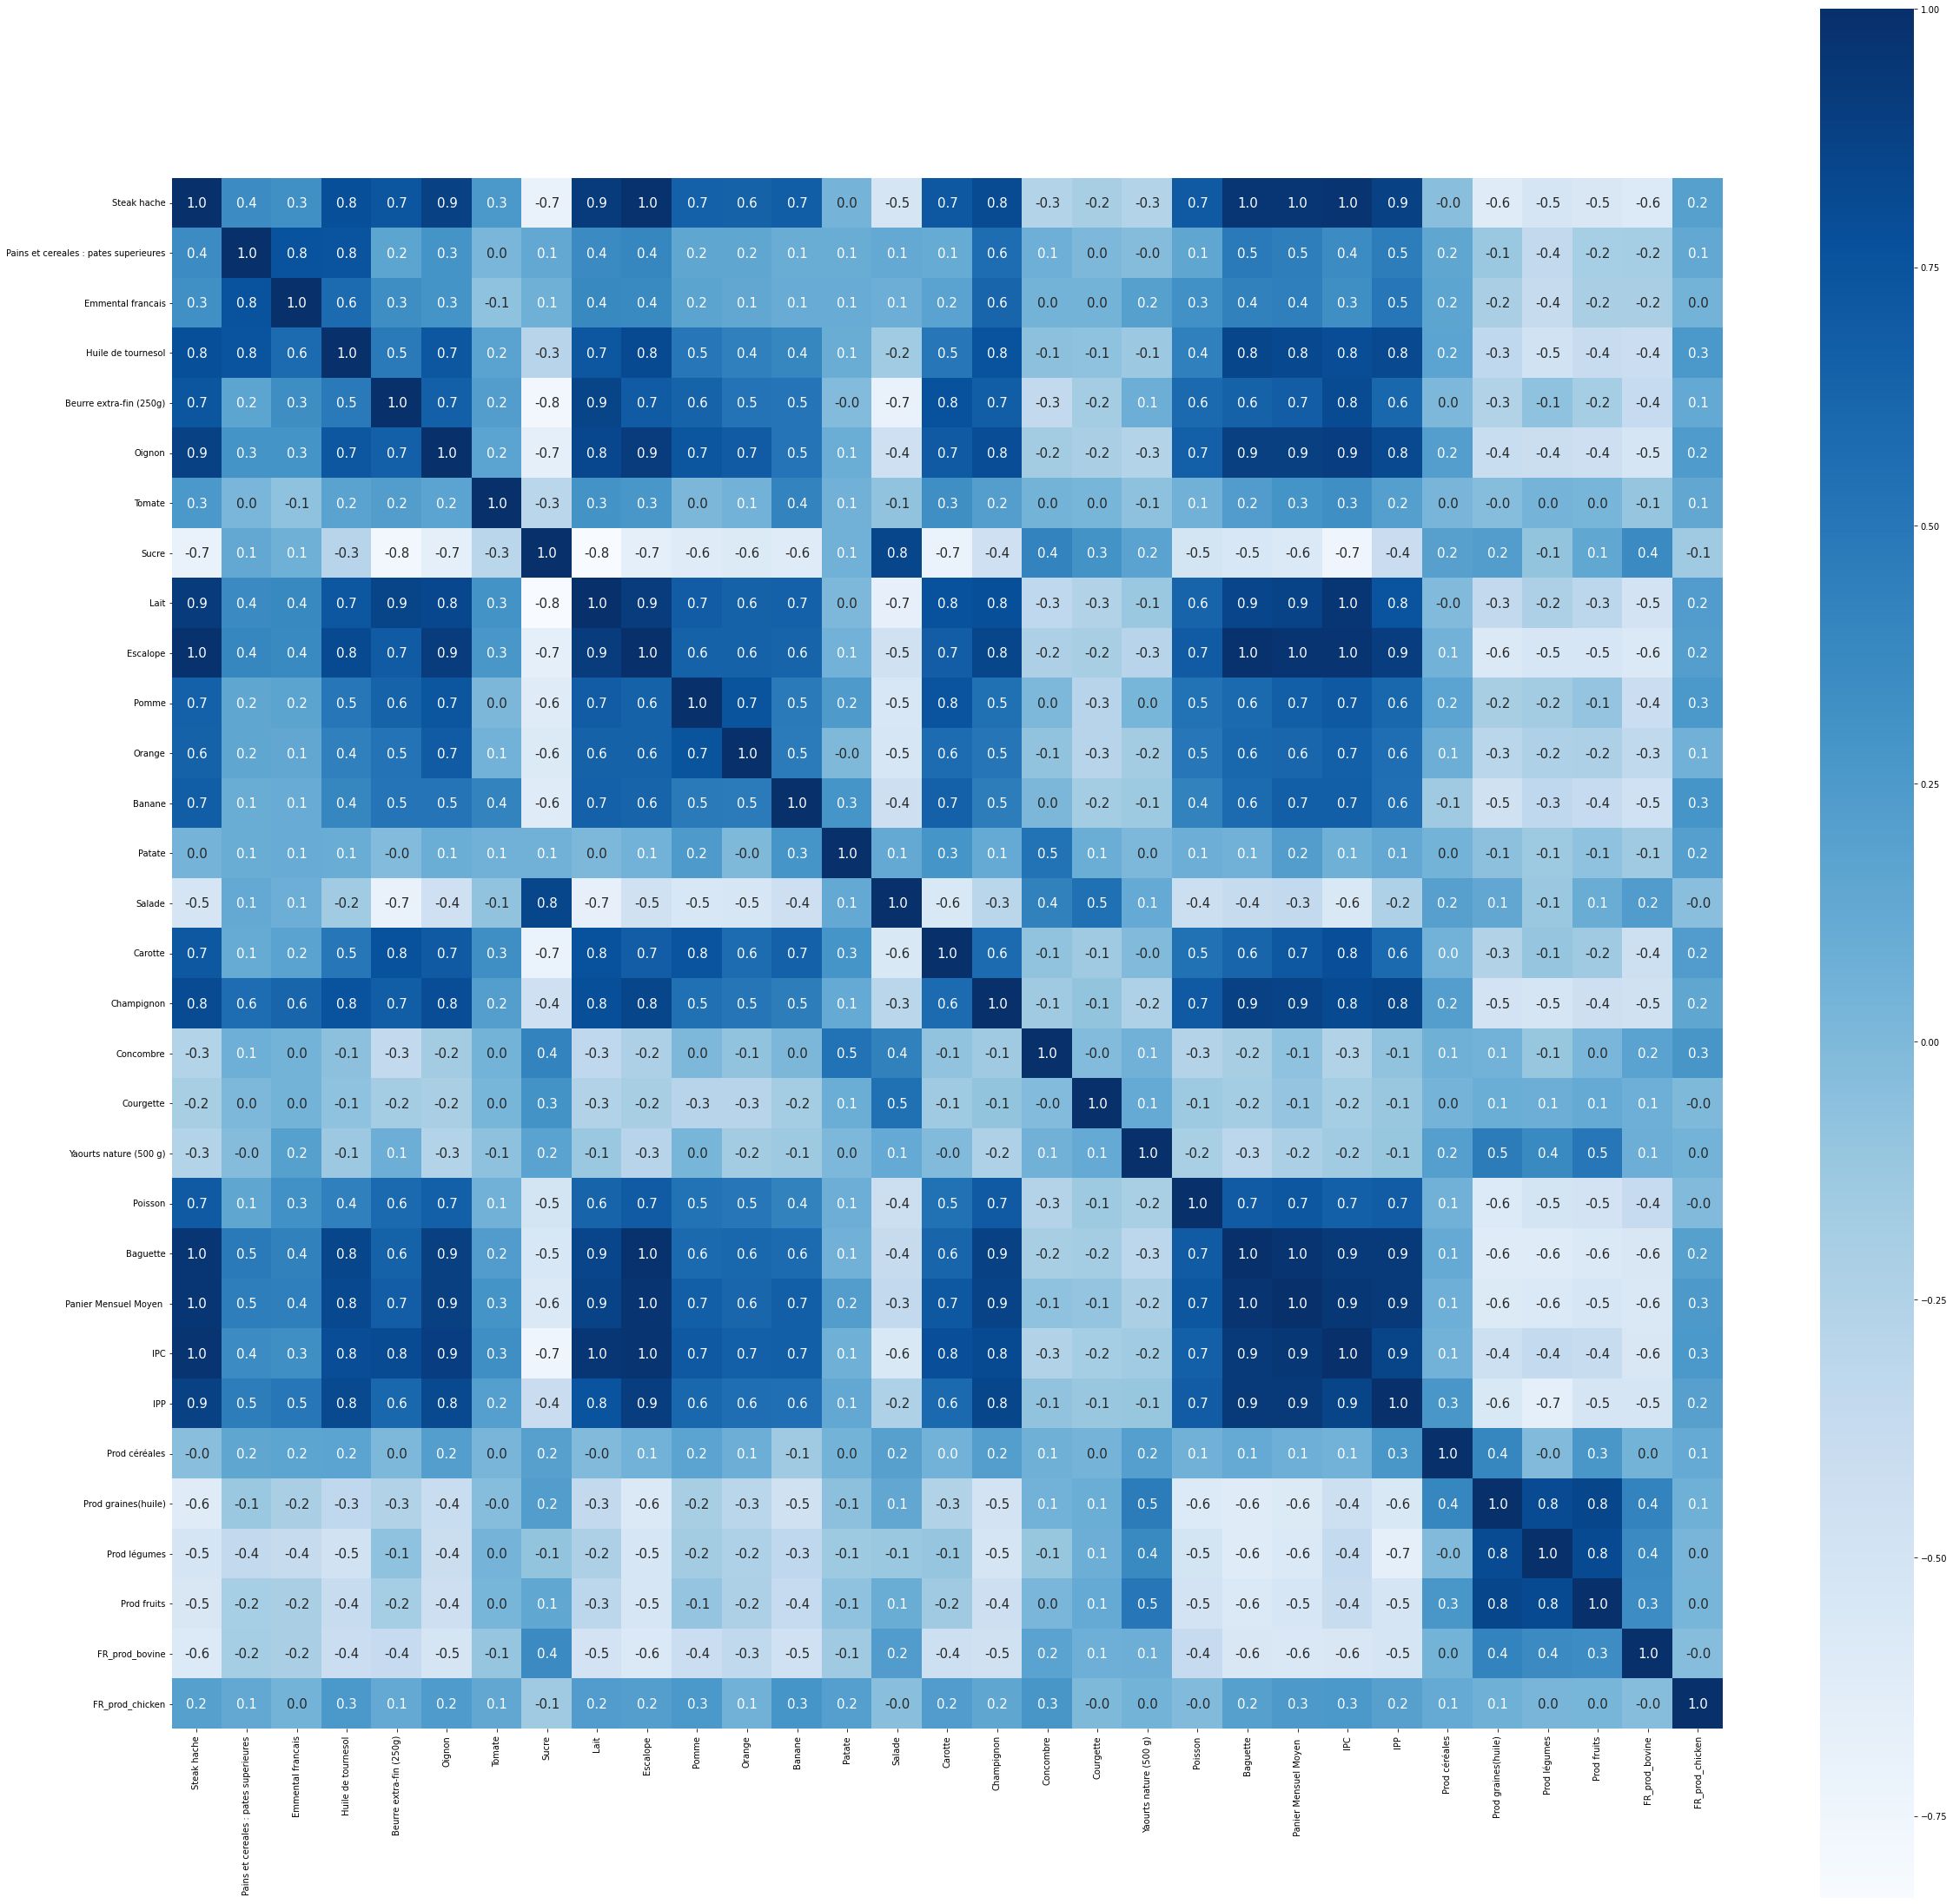

In [205]:
plt.figure(figsize=(40,40))
sns.heatmap(cor, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

D'après la représentation de la matrice, on remarque qu'il y a une forte corrélation entre le prix du panier et le prix des steaks hâchées, ce qui semble a priori logique. Par contre, on remarque qu'il y a une corrélation parfaite (=1) entre prix des baguettes et prix des steaks ce qui n'est pas justifiable. Ainsi, il ne suffit pas de s'appuyer sur la corrélation pour analyser les rapports entre les variables.



On s'interesse maintenant à l'évolution de quelques variables.

In [231]:
L=dff_.index
L1=list(L[i] for i in range(216)) #taking the list of dates

In [230]:
#Evolution du prix du panier mensuel
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=L1, y=list(dff_[' Panier Mensuel Moyen '])))

fig.update_layout(
    title_text="Evolution du prix du panier mensuel"
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [233]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=L1, y=list(dff_['IPC']),name='IPC'))
fig.add_trace(
    go.Scatter(x=L1, y=list(dff_['IPP']),name='IPP'))

fig.update_layout(
    title_text="Evolution des indices"
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

On remarque que l'allure de la courbe du prix du panier ressemble à celle des indices.


---

Ces remarques sont à confirmer (ou rejetter) par le modèle qu'on a choisi.